In [3]:
import os
import pandas as pd
import requests
import numpy as np
import time
from geopy.distance import geodesic


In [4]:

# Print the current working directory
print("Current Working Directory:", os.getcwd())

# Change the current working directory
new_directory = r'C:\Users\naveens\Downloads\spirent'
os.chdir(new_directory)

# Print the new working directory
print("New Working Directory:", os.getcwd())

Current Working Directory: c:\Users\naveens\Downloads\spirent
New Working Directory: C:\Users\naveens\Downloads\spirent


In [5]:


# Specify the path to your CSV file
csv_file_path = r'Charge_Detail.csv'
# Join the directory and file name to create the full file path
file_path = os.path.join(new_directory, csv_file_path)

print(file_path)

C:\Users\naveens\Downloads\spirent\Charge_Detail.csv


In [6]:
# Adjust pandas settings to display all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 2000)
pd.set_option('display.max_colwidth', None)

# Read the CSV file into a DataFrame
Charge_df = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame
print(Charge_df.head())

  Carrier  Account #              Company(s)  Invoice #  Invoice Amount Invoice Date            Charge Type                Charge Description  Original Charge  Discount  Net Charge Currency Transportation Mode    Tracking #  Parent Tracking # Service Code                 Service Level      Container Type Zone   Ship Date Delivery Date Delivery Time Actual Weight Actual Weight Unit Billed Weight Billed Weight Unit  Length  Width  Height     Shipper Name          Shipper Company         Shipper Address Line 1 Shipper Address Line 2     Shipper City Shipper State Shipper Postal Code Shipper Country Receiver Name        Receiver Company    Receiver Address Line 1 Receiver Address Line 2 Receiver City Receiver State Receiver Postal Code Receiver Country  Bill Option  Declared Value  Piece Count                     Reference 1                  Reference 2                  Reference 3 Reference 4 Reference 5 Reference 6 Reference 7  Reference 8  Gl Code 1  Gl Code 2  Gl Code 3 Spirent/Patner 

C:\Users\naveens\AppData\Local\Temp\ipykernel_34096\992922323.py:7: DtypeWarning: Columns (13,22,24,52,53,54) have mixed types. Specify dtype option on import or set low_memory=False.
  Charge_df = pd.read_csv(csv_file_path)


In [7]:
# List of specific account numbers
specific_accounts = [
    123113403, 604197341, 818723164, 407566904, 954973158, 120927337, 887978328,
    873514825, 171440238, 153293376, 134694653, 258350669, 258350162, 231638644,
    228450928, 267951748, 267952027, 250525435, 379408664, 312410842, 880363077,
    333449099, 280711365, 200161874, 249993875
]

# Add a new column based on the condition
Charge_df['Spirent/Patner FedEx Account'] = Charge_df['Account #'].apply(lambda x: 'Spirent Account' if x in specific_accounts else 'Customer Account')


In [8]:
 Charge_df['Receiver Company'].astype('str')
 Charge_df['Receiver Company'].dtype

dtype('O')

In [9]:
# Add a new column based on the condition
Charge_df['Receiver Account'] = Charge_df['Receiver Company'].apply(lambda x: 'Spirent Internal' if 'spirent' in str(x).lower() else x)

In [34]:
Charge_df['Receiver Account'].isna().head()
Charge_df[Charge_df['Receiver Account'].isna()].head()


,Carrier,Account #,Company(s),Invoice #,Invoice Amount,Invoice Date,Charge Type,Charge Description,Original Charge,Discount,Net Charge,Currency,Transportation Mode,Tracking #,Parent Tracking #,Service Code,Service Level,Container Type,Zone,Ship Date,Delivery Date,Delivery Time,Actual Weight,Actual Weight Unit,Billed Weight,Billed Weight Unit,Length,Width,Height,Shipper Name,Shipper Company,Shipper Address Line 1,Shipper Address Line 2,Shipper City,Shipper State,Shipper Postal Code,Shipper Country,Receiver Name,Receiver Company,Receiver Address Line 1,Receiver Address Line 2,Receiver City,Receiver State,Receiver Postal Code,Receiver Country,Bill Option,Declared Value,Piece Count,Reference 1,Reference 2,Reference 3,Reference 4,Reference 5,Reference 6,Reference 7,Reference 8,Gl Code 1,Gl Code 2,Gl Code 3,Spirent/Patner FedEx Account,Receiver Account,Shipper Full Address,Receiver Full Address,Shipper Postal Code refined
125,FedEx,577775524,Spirent Communications,965001309,847.13,2023-05-04,Late Payment Fees,Late Fee_LF1,847.13,NaN,847.13,USD,Parcel,000173049295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,,,NaN,NaN,NaN,NaN,,,,,Prepaid,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Customer Account,NaN,NaN,NaN,NaN
137,FedEx,134694653,Spirent Communications,812209132,2623.50,2023-05-05,Transportation,FedEx Standard Overnight,102.15,69.46,32.69,USD,Parcel,771912979796,NaN,so,FedEx Standard Overnight,Customer Packaging,07,2023-04-26,2023-04-27,13:30,1.0,LB,3.0,LB,12.0,9.0,3.0,Robert Scott,NaN,2708 Orchard Parkway,Suite20,SAN JOSE,CA,95134,US,Yang Haung,NaN,1813 Glenville Drive,NaN,ALLEN,TX,75013,US,Prepaid,1.0,1.0,Yang,NaN,NaN,90282,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Customer Account,NaN,"2708 Orchard Parkway, Suite20, SAN JOSE, CA 95134, US","1813 Glenville Drive, , ALLEN, TX 75013, US",75013
138,FedEx,134694653,Spirent Communications,812209132,2623.50,2023-05-05,Residential Pickup/Delivery Fees,Residential Delivery,5.80,NaN,5.80,USD,Parcel,771912979796,NaN,so,FedEx Standard Overnight,Customer Packaging,07,2023-04-26,2023-04-27,13:30,1.0,LB,3.0,LB,12.0,9.0,3.0,Robert Scott,NaN,2708 Orchard Parkway,Suite20,SAN JOSE,CA,95134,US,Yang Haung,NaN,1813 Glenville Drive,NaN,ALLEN,TX,75013,US,Prepaid,1.0,1.0,Yang,NaN,NaN,90282,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Customer Account,NaN,"2708 Orchard Parkway, Suite20, SAN JOSE, CA 95134, US","1813 Glenville Drive, , ALLEN, TX 75013, US",75013
139,FedEx,134694653,Spirent Communications,812209132,2623.50,2023-05-05,Declared Value Fees,Declared Value Charge,0.00,NaN,0.00,USD,Parcel,771912979796,NaN,so,FedEx Standard Overnight,Customer Packaging,07,2023-04-26,2023-04-27,13:30,1.0,LB,3.0,LB,12.0,9.0,3.0,Robert Scott,NaN,2708 Orchard Parkway,Suite20,SAN JOSE,CA,95134,US,Yang Haung,NaN,1813 Glenville Drive,NaN,ALLEN,TX,75013,US,Prepaid,1.0,1.0,Yang,NaN,NaN,90282,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Customer Account,NaN,"2708 Orchard Parkway, Suite20, SAN JOSE, CA 95134, US","1813 Glenville Drive, , ALLEN, TX 75013, US",75013
140,FedEx,134694653,Spirent Communications,812209132,2623.50,2023-05-05,Miscellaneous Fees,Weekday Delivery,0.00,NaN,0.00,USD,Parcel,771912979796,NaN,so,FedEx Standard Overnight,Customer Packaging,07,2023-04-26,2023-04-27,13:30,1.0,LB,3.0,LB,12.0,9.0,3.0,Robert Scott,NaN,2708 Orchard Parkway,Suite20,SAN JOSE,CA,95134,US,Yang Haung,NaN,1813 Glenville Drive,NaN,ALLEN,TX,75013,US,Prepaid,1.0,1.0,Yang,NaN,NaN,90282,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Customer Account,NaN,"2708 Orchard Parkway, Suite20, SAN JOSE, CA 95134, US","1813 Glenville Drive, , ALLEN, TX 75013, US",75013


In [114]:
# Fill missing values with empty strings
Charge_df['Shipper City'] = Charge_df['Shipper City'].fillna('')
Charge_df['Shipper State'] = Charge_df['Shipper State'].fillna('')
Charge_df['Shipper Postal Code'] = Charge_df['Shipper Postal Code'].fillna('').astype(str)
Charge_df['Shipper Country'] = Charge_df['Shipper Country'].fillna('')

Charge_df['Receiver City'] = Charge_df['Receiver City'].fillna('')
Charge_df['Receiver State'] = Charge_df['Receiver State'].fillna('')
Charge_df['Receiver Postal Code'] = Charge_df['Receiver Postal Code'].fillna('').astype(str)
Charge_df['Receiver Country'] = Charge_df['Receiver Country'].fillna('')


# Create the Shipper Full Address column
Charge_df['Shipper Full Address'] = Charge_df['Shipper Address Line 1']+ ", " + \
                             Charge_df['Shipper Address Line 2'].fillna('') + ", " + \
                             Charge_df['Shipper City'] + ", " + \
                             Charge_df['Shipper State'] .astype(str).fillna('')+ " " + \
                             Charge_df['Shipper Postal Code'].astype(str) + ", " + \
                             Charge_df['Shipper Country']
#
# Create the Receiver Full Address column similarly
Charge_df['Receiver Full Address'] = Charge_df['Receiver Address Line 1'] + ", " + \
                              Charge_df['Receiver Address Line 2'].fillna('') + ", " + \
                              Charge_df['Receiver City'] + ", " + \
                              Charge_df['Receiver State'] + " " + \
                              Charge_df['Receiver Postal Code'].astype(str) + ", " + \
                              Charge_df['Receiver Country']

# Delete the column
Charge_df.drop(columns=['Receiver Postal Code refined'], inplace=True)
#Truncate US postal codes to the first 5 digits
Charge_df.loc[Charge_df['Receiver Country'] == 'US', 'Receiver Postal Code refined'] = Charge_df.loc[Charge_df['Receiver Country'] == 'US', 'Receiver Postal Code'].astype('str').str[:5]

In [137]:
#Charge_df['Receiver Postal Code refined'].head()
Charge_df['Shipper Postal Code refined'] = Charge_df['Shipper Postal Code refined'].fillna('') 
# Create a new column 'Shipper Postal Code refined' based on the conditions
Charge_df['Shipper Postal Code refined'] = np.where(
    Charge_df['Shipper Country'] == 'US',
    Charge_df['Shipper Postal Code'].str[:5],
    Charge_df['Shipper Postal Code']
)
Charge_df[['Shipper Postal Code','Shipper Country','Shipper Postal Code refined']].head(50)


#Charge_df['Receiver Postal Code refined'].head()
Charge_df['Receiver Postal Code refined'] = Charge_df['Receiver Postal Code refined'].fillna('') 
# Create a new column 'Shipper Postal Code refined' based on the conditions
Charge_df['Receiver Postal Code refined'] = np.where(
    Charge_df['Receiver Country'] == 'US',
    Charge_df['Receiver Postal Code'].str[:5],
    Charge_df['Receiver Postal Code']
)
Charge_df[['Receiver Postal Code','Receiver Country','Receiver Postal Code refined']].head(50)

"\n#Charge_df['Receiver Postal Code refined'].head()\nCharge_df['Receiver Postal Code refined'] = Charge_df['Receiver Postal Code refined'].fillna('') \n# Create a new column 'Shipper Postal Code refined' based on the conditions\nCharge_df['Receiver Postal Code refined'] = np.where(\n    Charge_df['Receiver Country'] == 'US',\n    Charge_df['Receiver Postal Code'].str[:5],\n    Charge_df['Receiver Postal Code']\n)\nCharge_df[['Receiver Postal Code','Receiver Country','Receiver Postal Code refined']].head(50) "

In [156]:
# Extract unique combinations of city, state, postal code, and country
#unique_addresses = Charge_df[['Shipper Postal Code refined', 'Shipper Country']].drop_duplicates()
unique_addresses_shipper = Charge_df[['Shipper Postal Code refined', 'Shipper Country']].drop_duplicates()
unique_addresses_receiver = Charge_df[['Receiver Postal Code refined', 'Receiver Country']].drop_duplicates()


In [159]:
unique_addresses_shipper['Shipper Postal Code refined']=unique_addresses_shipper['Shipper Postal Code refined'].fillna('')
unique_addresses_receiver['Receiver Postal Code refined']=unique_addresses_receiver['Receiver Postal Code refined'].fillna('')
unique_addresses_receiver.head(20)


,Receiver Postal Code refined,Receiver Country
0,07733,US
13,ROC,TW
16,23146,TW
20,100191,CN
29,310004,CN
32,RH101BD,GB
36,307591,SG
40,TQ47QR,GB
44,1038285,JP
48,T5J0E5,CA


In [160]:
# Function to construct the structured URL and get latitude and longitude
def get_lat_long_structured( postal_code, country, api_key):
    url = f"https://geocode.maps.co/search?&postalcode={postal_code}&country={country}&api_key={api_key}"
    try:
        response = requests.get(url)
        response.raise_for_status()
        data = response.json()
        if data:
            return data[0]['lat'], data[0]['lon']
        else:
            return None, None
    except Exception as e:
        print(f"Error: {e}")
        return None, None

# Your API key
api_key = '666a5fc2f32ac612365813itkd0e0dd'

In [141]:
# Geocode unique addresses
latitudes = []
longitudes = []
for _, row in unique_addresses_shipper.iterrows():
    postal_code = row['Shipper Postal Code refined']
    country = row['Shipper Country']
    lat, lon = get_lat_long_structured(postal_code, country, api_key)
    latitudes.append(lat)
    longitudes.append(lon)
    time.sleep(1)  # Respect the rate limit of 1 request per second

# Add latitude and longitude to the unique addresses DataFrame
unique_addresses_shipper['Shipper Latitude'] = latitudes
unique_addresses_shipper['Shipper Longitude'] = longitudes

In [162]:
# Geocode unique addresses
latitudes = []
longitudes = []
for _, row in unique_addresses_receiver.iterrows():
    postal_code = row['Receiver Postal Code refined']
    country = row['Receiver Country']
    lat, lon = get_lat_long_structured(postal_code, country, api_key)
    latitudes.append(lat)
    longitudes.append(lon)
    time.sleep(1)  # Respect the rate limit of 1 request per second

# Add latitude and longitude to the unique addresses DataFrame
unique_addresses_receiver['Receiver Latitude'] = latitudes
unique_addresses_receiver['Receiver Longitude'] = longitudes

In [145]:
unique_addresses_shipper.head(50)
#Shipper_lat_long_df = unique_addresses

#Shipper_lat_long_df.head()


Shipper_lat_long_df = unique_addresses_shipper
Shipper_lat_long_df_path = r'Shipper_lat_long_df.csv'
Shipper_lat_long_df.to_csv(os.path.join(new_directory, Shipper_lat_long_df_path),index=False)


In [163]:
unique_addresses_receiver.head(50)

,Receiver Postal Code refined,Receiver Country,Receiver Latitude,Receiver Longitude
0,07733,US,40.38988343178138,-74.17243721275304
13,ROC,TW,None,None
16,23146,TW,24.967159683333335,121.5439326
20,100191,CN,39.9822826,116.356344025
29,310004,CN,30.3127042,120.1699776
32,RH101BD,GB,51.11868,-0.18948
36,307591,SG,1.3172706818181819,103.84356663636363
40,TQ47QR,GB,50.4241662,-3.5966771333333334
44,1038285,JP,None,None
48,T5J0E5,CA,53.5429293,-113.4917751


In [165]:



Receiver_lat_long_df = unique_addresses_receiver
Receiver_lat_long_df_path = r'Receiver_lat_long_df.csv'
Receiver_lat_long_df.to_csv(os.path.join(new_directory, Receiver_lat_long_df_path),index=False)


In [178]:
# Merge the geocoded results back to the original DataFrame
df = pd.merge(Charge_df, Shipper_lat_long_df, on=['Shipper Postal Code refined', 'Shipper Country'], how='left')
df.head(2)

# Merge the geocoded results back to the original DataFrame
df = pd.merge(df, Receiver_lat_long_df, on=['Receiver Postal Code refined', 'Receiver Country'], how='left')
df.head(2)


,Carrier,Account #,Company(s),Invoice #,Invoice Amount,Invoice Date,Charge Type,Charge Description,Original Charge,Discount,Net Charge,Currency,Transportation Mode,Tracking #,Parent Tracking #,Service Code,Service Level,Container Type,Zone,Ship Date,Delivery Date,Delivery Time,Actual Weight,Actual Weight Unit,Billed Weight,Billed Weight Unit,Length,Width,Height,Shipper Name,Shipper Company,Shipper Address Line 1,Shipper Address Line 2,Shipper City,Shipper State,Shipper Postal Code,Shipper Country,Receiver Name,Receiver Company,Receiver Address Line 1,Receiver Address Line 2,Receiver City,Receiver State,Receiver Postal Code,Receiver Country,Bill Option,Declared Value,Piece Count,Reference 1,Reference 2,Reference 3,Reference 4,Reference 5,Reference 6,Reference 7,Reference 8,Gl Code 1,Gl Code 2,Gl Code 3,Spirent/Patner FedEx Account,Receiver Account,Shipper Full Address,Receiver Full Address,Shipper Postal Code refined,Receiver Postal Code refined,Shipper Latitude,Shipper Longitude,Receiver Latitude,Receiver Longitude
0,FedEx,604197341,Spirent Communications,215462541,377.9,2023-05-01,Customs & Duties Fees,Disbursement Fee,12.0,NaN,12.0,USD,Parcel,620531656548,NaN,ip,FedEx International Priority,Customer Packaging,NaN,2023-04-14,2023-04-19,09:32,130.0,LB,130.0,LB,NaN,NaN,NaN,JOHNNY LIU,BUREAU VERITAS CONSUMER,"B2, NO.215, SEC. 3, BEIXIN RD",XINDIAN DIST,NEW TAIPEI CITY,,23143,TW,BRAD BALL,SPIRENT COMMUNICATIONS,101 CRAWFORDS CORNER ROAD,SUITE 1C05,HOLMDEL,NJ,07733,US,Third Party,NaN,1.0,VR5 8 CHANNEL WIRELESS EMULATO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Customer Account,Spirent Internal,"B2, NO.215, SEC. 3, BEIXIN RD, XINDIAN DIST, NEW TAIPEI CITY, 23143, TW","101 CRAWFORDS CORNER ROAD, SUITE 1C05, HOLMDEL, NJ 07733, US",23143,07733,24.981637774193548,121.54043698387096,40.38988343178138,-74.17243721275304
1,FedEx,604197341,Spirent Communications,215462541,377.9,2023-05-01,Miscellaneous Fees,Merchandise Processing Fee,346.4,NaN,346.4,USD,Parcel,620531656548,NaN,ip,FedEx International Priority,Customer Packaging,NaN,2023-04-14,2023-04-19,09:32,130.0,LB,130.0,LB,NaN,NaN,NaN,JOHNNY LIU,BUREAU VERITAS CONSUMER,"B2, NO.215, SEC. 3, BEIXIN RD",XINDIAN DIST,NEW TAIPEI CITY,,23143,TW,BRAD BALL,SPIRENT COMMUNICATIONS,101 CRAWFORDS CORNER ROAD,SUITE 1C05,HOLMDEL,NJ,07733,US,Third Party,NaN,1.0,VR5 8 CHANNEL WIRELESS EMULATO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Customer Account,Spirent Internal,"B2, NO.215, SEC. 3, BEIXIN RD, XINDIAN DIST, NEW TAIPEI CITY, 23143, TW","101 CRAWFORDS CORNER ROAD, SUITE 1C05, HOLMDEL, NJ 07733, US",23143,07733,24.981637774193548,121.54043698387096,40.38988343178138,-74.17243721275304


In [12]:
# Replace empty strings with NaN
df['Shipper Latitude'] = df['Shipper Latitude'].replace('', pd.NA)
df['Shipper Longitude'] = df['Shipper Longitude'].replace('', pd.NA)
df['Receiver Latitude'] = df['Receiver Latitude'].replace('', pd.NA)
df['Receiver Longitude'] = df['Receiver Longitude'].replace('', pd.NA)

# Drop rows where any of the lat/long columns have NaN values
cleaned_df = df.dropna(subset=['Shipper Latitude', 'Shipper Longitude', 'Receiver Latitude', 'Receiver Longitude'])

# Display the first few rows of the cleaned DataFrame
print("After removing rows with empty lat/long:")
print(cleaned_df.head())

NameError: name 'df' is not defined

In [186]:
cleaned_df.to_csv(os.path.join(new_directory, r'cleaned_lat_long_charge_detail.csv'),index=False)


In [7]:
file_path_clead_df = r'cleaned_lat_long_charge_detail.csv'

cleaned_df = pd.read_csv(os.path.join(new_directory,file_path_clead_df))

C:\Users\naveens\AppData\Local\Temp\ipykernel_34096\15544321.py:3: DtypeWarning: Columns (22,24,52) have mixed types. Specify dtype option on import or set low_memory=False.
  cleaned_df = pd.read_csv(os.path.join(new_directory,file_path_clead_df))


In [8]:
# Example function to calculate distance
def calculate_distance(row):
    # Get coordinates for shipper and receiver
    coords_1 = (row['Shipper Latitude'], row['Shipper Longitude'])
    coords_2 = (row['Receiver Latitude'], row['Receiver Longitude'])
    
    # Calculate and return the distance
    return geodesic(coords_1, coords_2).miles


In [9]:
# Ensure latitude and longitude columns are numeric
cleaned_df['Shipper Latitude'] = pd.to_numeric(cleaned_df['Shipper Latitude'], errors='coerce')
cleaned_df['Shipper Longitude'] = pd.to_numeric(cleaned_df['Shipper Longitude'], errors='coerce')
cleaned_df['Receiver Latitude'] = pd.to_numeric(cleaned_df['Receiver Latitude'], errors='coerce')
cleaned_df['Receiver Longitude'] = pd.to_numeric(cleaned_df['Receiver Longitude'], errors='coerce')

# Drop rows with NaN values in latitude and longitude columns using .loc
cleaned_df = cleaned_df.loc[cleaned_df.dropna(subset=['Shipper Latitude', 'Shipper Longitude', 'Receiver Latitude', 'Receiver Longitude']).index]

# Calculate distances using .loc to avoid SettingWithCopyWarning
cleaned_df.loc[:, 'Distance'] = cleaned_df.apply(calculate_distance, axis=1)

# Display the first few rows of the cleaned DataFrame with distances
print(cleaned_df[['Shipper Latitude', 'Shipper Longitude', 'Receiver Latitude', 'Receiver Longitude', 'Distance']].head())

   Shipper Latitude  Shipper Longitude  Receiver Latitude  Receiver Longitude     Distance
0         24.981638         121.540437          40.389883          -74.172437  7821.507001
1         24.981638         121.540437          40.389883          -74.172437  7821.507001
2         24.981638         121.540437          40.389883          -74.172437  7821.507001
3         24.981638         121.540437          40.389883          -74.172437  7821.507001
4         40.389883         -74.172437          24.967160          121.543933  7822.429233


In [10]:
cleaned_df['Distance Unit'] = 'miles'
cleaned_df['Distance']=cleaned_df['Distance'].round(2)
cleaned_df.head()

,Carrier,Account #,Company(s),Invoice #,Invoice Amount,Invoice Date,Charge Type,Charge Description,Original Charge,Discount,Net Charge,Currency,Transportation Mode,Tracking #,Parent Tracking #,Service Code,Service Level,Container Type,Zone,Ship Date,Delivery Date,Delivery Time,Actual Weight,Actual Weight Unit,Billed Weight,Billed Weight Unit,Length,Width,Height,Shipper Name,Shipper Company,Shipper Address Line 1,Shipper Address Line 2,Shipper City,Shipper State,Shipper Postal Code,Shipper Country,Receiver Name,Receiver Company,Receiver Address Line 1,Receiver Address Line 2,Receiver City,Receiver State,Receiver Postal Code,Receiver Country,Bill Option,Declared Value,Piece Count,Reference 1,Reference 2,Reference 3,Reference 4,Reference 5,Reference 6,Reference 7,Reference 8,Gl Code 1,Gl Code 2,Gl Code 3,Spirent/Patner FedEx Account,Receiver Account,Shipper Full Address,Receiver Full Address,Shipper Postal Code refined,Receiver Postal Code refined,Shipper Latitude,Shipper Longitude,Receiver Latitude,Receiver Longitude,Distance,Distance Unit
0,FedEx,604197341,Spirent Communications,215462541,377.90,2023-05-01,Customs & Duties Fees,Disbursement Fee,12.00,NaN,12.00,USD,Parcel,620531656548,NaN,ip,FedEx International Priority,Customer Packaging,NaN,2023-04-14,2023-04-19,09:32,130.0,LB,130.0,LB,NaN,NaN,NaN,JOHNNY LIU,BUREAU VERITAS CONSUMER,"B2, NO.215, SEC. 3, BEIXIN RD",XINDIAN DIST,NEW TAIPEI CITY,NaN,23143,TW,BRAD BALL,SPIRENT COMMUNICATIONS,101 CRAWFORDS CORNER ROAD,SUITE 1C05,HOLMDEL,NJ,07733,US,Third Party,NaN,1.0,VR5 8 CHANNEL WIRELESS EMULATO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Customer Account,Spirent Internal,"B2, NO.215, SEC. 3, BEIXIN RD, XINDIAN DIST, NEW TAIPEI CITY, 23143, TW","101 CRAWFORDS CORNER ROAD, SUITE 1C05, HOLMDEL, NJ 07733, US",23143,07733,24.981638,121.540437,40.389883,-74.172437,7821.51,miles
1,FedEx,604197341,Spirent Communications,215462541,377.90,2023-05-01,Miscellaneous Fees,Merchandise Processing Fee,346.40,NaN,346.40,USD,Parcel,620531656548,NaN,ip,FedEx International Priority,Customer Packaging,NaN,2023-04-14,2023-04-19,09:32,130.0,LB,130.0,LB,NaN,NaN,NaN,JOHNNY LIU,BUREAU VERITAS CONSUMER,"B2, NO.215, SEC. 3, BEIXIN RD",XINDIAN DIST,NEW TAIPEI CITY,NaN,23143,TW,BRAD BALL,SPIRENT COMMUNICATIONS,101 CRAWFORDS CORNER ROAD,SUITE 1C05,HOLMDEL,NJ,07733,US,Third Party,NaN,1.0,VR5 8 CHANNEL WIRELESS EMULATO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Customer Account,Spirent Internal,"B2, NO.215, SEC. 3, BEIXIN RD, XINDIAN DIST, NEW TAIPEI CITY, 23143, TW","101 CRAWFORDS CORNER ROAD, SUITE 1C05, HOLMDEL, NJ 07733, US",23143,07733,24.981638,121.540437,40.389883,-74.172437,7821.51,miles
2,FedEx,604197341,Spirent Communications,215462541,377.90,2023-05-01,Miscellaneous Fees,Special Brokerage Processing Fee,19.50,NaN,19.50,USD,Parcel,620531656548,NaN,ip,FedEx International Priority,Customer Packaging,NaN,2023-04-14,2023-04-19,09:32,130.0,LB,130.0,LB,NaN,NaN,NaN,JOHNNY LIU,BUREAU VERITAS CONSUMER,"B2, NO.215, SEC. 3, BEIXIN RD",XINDIAN DIST,NEW TAIPEI CITY,NaN,23143,TW,BRAD BALL,SPIRENT COMMUNICATIONS,101 CRAWFORDS CORNER ROAD,SUITE 1C05,HOLMDEL,NJ,07733,US,Third Party,NaN,1.0,VR5 8 CHANNEL WIRELESS EMULATO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Customer Account,Spirent Internal,"B2, NO.215, SEC. 3, BEIXIN RD, XINDIAN DIST, NEW TAIPEI CITY, 23143, TW","101 CRAWFORDS CORNER ROAD, SUITE 1C05, HOLMDEL, NJ 07733, US",23143,07733,24.981638,121.540437,40.389883,-74.172437,7821.51,miles
3,FedEx,604197341,Spirent Communications,215462541,377.90,2023-05-01,Customs & Duties Fees,Customs Duty,0.00,NaN,0.00,USD,Parcel,620531656548,NaN,ip,FedEx International Priority,Customer Packaging,NaN,2023-04-14,2023-04-19,09:32,130.0,LB,130.0,LB,NaN,NaN,NaN,JOHNNY LIU,BUREAU VERITAS CONSUMER,"B2, NO.215, SEC. 3, BEIXIN RD",XINDIAN DIST,NEW TAIPEI CITY,NaN,23143,TW,BRAD BALL,SPIRENT COMMUNICATIONS,101 CRAWFORDS CORNER ROAD,SUITE 1C05,HOLMDEL,NJ,07733,US,Third Party,NaN,1.0,VR5 8 CHANNEL WIRELESS EMULATO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [11]:
# Create the 'Internal Employee' column based on conditions
cleaned_df['Internal Employee'] = np.where(
    (cleaned_df['Receiver Name'].notna()) & (cleaned_df['Receiver Company'].isna() | cleaned_df['Receiver Company'].eq('')),
    'Internal Employee',
    ''  # or '' if you prefer to leave it as an empty string
)

###ML Algorithms

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

In [44]:
# Ensure Distance, Actual Weight, and coordinates are numeric
cleaned_df['Distance'] = pd.to_numeric(cleaned_df['Distance'], errors='coerce')
cleaned_df['Actual Weight'] = pd.to_numeric(cleaned_df['Actual Weight'], errors='coerce')
cleaned_df['Shipper Latitude'] = pd.to_numeric(cleaned_df['Shipper Latitude'], errors='coerce')
cleaned_df['Shipper Longitude'] = pd.to_numeric(cleaned_df['Shipper Longitude'], errors='coerce')
cleaned_df['Receiver Latitude'] = pd.to_numeric(cleaned_df['Receiver Latitude'], errors='coerce')
cleaned_df['Receiver Longitude'] = pd.to_numeric(cleaned_df['Receiver Longitude'], errors='coerce')
cleaned_df['Net Charge'] = pd.to_numeric(cleaned_df['Net Charge'], errors='coerce')

C:\Users\naveens\AppData\Local\Temp\ipykernel_24272\1183379236.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['Distance'] = pd.to_numeric(cleaned_df['Distance'], errors='coerce')
C:\Users\naveens\AppData\Local\Temp\ipykernel_24272\1183379236.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['Actual Weight'] = pd.to_numeric(cleaned_df['Actual Weight'], errors='coerce')
C:\Users\naveens\AppData\Local\Temp\ipykernel_24272\1183379236.py:4: SettingWithCopyWarning: 
A value is trying 

In [45]:
# Drop rows with NaN values in the relevant columns
cleaned_df = cleaned_df.dropna(subset=['Shipper Latitude', 'Shipper Longitude', 'Receiver Latitude', 'Receiver Longitude', 'Distance', 'Actual Weight', 'Net Charge'])

In [46]:
# Define features and target variable
X = cleaned_df[['Shipper Latitude', 'Shipper Longitude', 'Receiver Latitude', 'Receiver Longitude', 'Distance', 'Actual Weight']]
y = cleaned_df['Net Charge']

In [47]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [49]:
# Initialize and train a RandomForestRegressor model
model = RandomForestRegressor(random_state=42)

In [50]:
# Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [51]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_absolute_error')
grid_search.fit(X_train_scaled, y_train)

# Best parameters from grid search
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Train the model with the best parameters
best_model = grid_search.best_estimator_

# Evaluate the model using cross-validation
cv_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_absolute_error')
print(f"Cross-validation MAE: {-cv_scores.mean()}")

# Make predictions on the testing set
y_pred = best_model.predict(X_test_scaled)

Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Cross-validation MAE: 49.71784517561487


In [52]:
# Initialize and train the RandomForestRegressor model with the best parameters
best_params = {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
model = RandomForestRegressor(**best_params, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                      n_estimators=300, random_state=42)

In [54]:
# Make predictions on the testing set
y_pred = model.predict(X_test_scaled)

In [55]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 46.46605686521465
Mean Squared Error (MSE): 21158.064716647346
Root Mean Squared Error (RMSE): 145.45812014682215


In [57]:
# Create a DataFrame with actual and predicted values
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Display the first few rows of the results
print(results_df.head(50))

       Actual   Predicted
12602   14.46   20.063554
30383   55.35   17.348594
9230   139.36   31.928478
10383    0.00   10.088564
1098    21.00   16.259082
211     18.42    7.805305
18275    2.72   14.828564
12440    3.45  113.664726
13688    0.00   10.463148
9068   228.40  250.243771
2228    19.50   23.479636
12460    0.00   16.957094
18536  592.52  109.921419
11627    7.28    7.243240
16015    5.15    8.178212
3695     3.97    9.013500
12977   31.50   16.264064
7324     4.33   29.231198
24436   25.20   23.023901
28137    0.00   38.523533
28789   24.11    8.439548
22046   61.35   22.111490
2149    19.50   96.920588
26344    3.52   15.611645
1418     3.00   57.388205
15683   31.11   39.313752
19582    1.20   37.605145
21024   12.00   40.842251
12655    3.45  113.664726
458     30.67    8.417523
15236   10.25   16.717275
20321   31.67   57.567983
19309    8.23    8.289702
29052   12.27    9.871913
13335   19.50   79.421809
20299   33.50   24.692414
21844   92.79   99.416013
10955   15.8

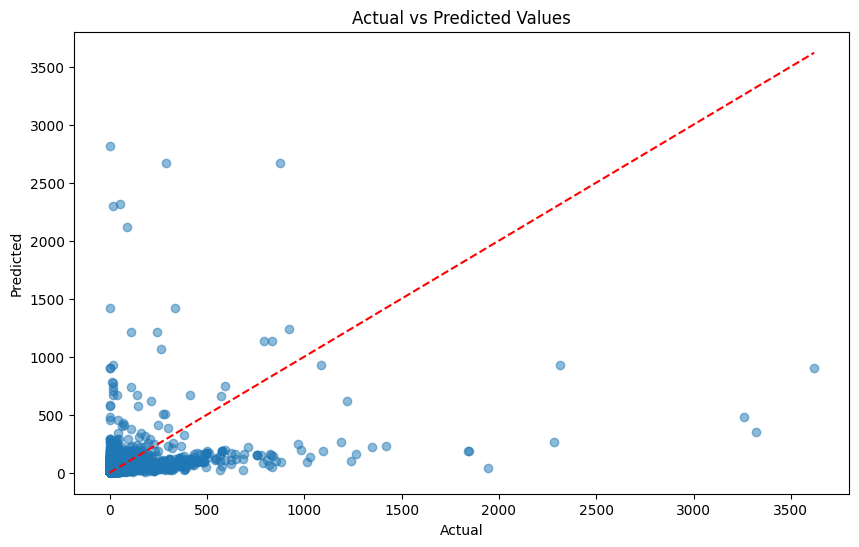

In [58]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(results_df['Actual'], results_df['Predicted'], alpha=0.5)
plt.plot([results_df['Actual'].min(), results_df['Actual'].max()], [results_df['Actual'].min(), results_df['Actual'].max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()


In [13]:
cleaned_df.to_csv(os.path.join(new_directory,r'Final_DataSet.csv'))

In [ ]:
cleaned_df.head()